[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_truncated_tutorial.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# Truncated multivariate normals: a tutorial

This notebook shows how to use **Composed Multivariate Normal** distributions (MoGs) when variables have **finite support** (e.g. $[0,1]$).

## Theoretical background

In real problems the domain of the variables is not infinite but bounded into a semi-finite region. 

If we start from the unbounded multivariate normal distribution:

$$
\mathcal{N}_k(\tilde U; \tilde \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^{k}\det \Sigma}} \exp\left[ -\frac{1}{2}(\tilde U - \tilde \mu)^{\rm T}\Sigma^{-1}(\tilde U - \tilde \mu) \right]
$$

Let $T\subset\{l,\dots,m\}$, where $l\leq k$ and $m\leq k$ be the set of indices of the truncated variables, and let $a_i<b_i$ be the truncation bounds for $i\in S$. Define the truncation region:

$$
A_S : \{\tilde U\in\mathbb{R}^k:\ a_i \le \tilde U_i \le b_i \ \ \forall\, i\in T \}
$$

with the remaining coordinates $i\notin T$ unbounded. The partially-truncated multivariate normal distribution is defined by

$$
\mathcal{TN}_T(\tilde U;\tilde\mu,\Sigma,\mathbf{a}_T,\mathbf{b}_T) = \frac{\mathcal{N}_k(\tilde U;\tilde\mu,\Sigma)\,\mathbf{1}_{A_T}(\tilde U)}{Z_ (\tilde\mu,\Sigma,\mathbf{a}_T,\mathbf{b}_T)},
$$

where $\mathbf{1}_{A_T}$ is the indicator function of $A_T$ and the normalization constant is

$$
Z_T(\tilde\mu,\Sigma,\mathbf{a}_T,\mathbf{b}_T)=
\int_{A_T}\mathcal{N}_k(\tilde T;\tilde\mu,\Sigma)\,d\tilde T
=
\mathbb{P}_{\tilde T\sim\mathcal{N}_k(\tilde\mu,\Sigma)}\left(\tilde T\in A_T\right).
$$


## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation


In [2]:
import multimin as mn
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

import warnings
warnings.filterwarnings("ignore")

figprefix = "truncated"

Welcome to MultiMin v0.9.7. ¡Al infinito y más allá!


## 1D distribution on a finite domain

Define a mixture of two Gaussians on the interval $[0, 1]$. Use the **domain** parameter: each variable can be `None` (unbounded) or `[low, high]`.

In [3]:
MoG_1d = mn.MixtureOfGaussians(
    mus=[0.2, 0.8],
    weights=[0.5, 0.5],
    Sigmas=[0.01, 0.03],
    domain=[[0, 1]]  # variable 0 bounded to [0, 1]
    #domain=[None]  # variable 0 bounded to [0, 1]
)

The parameters are:

In [4]:
MoG_1d.tabulate()

,w,mu_1,sigma_1
component,,,
1,0.5,0.2,0.01
2,0.5,0.8,0.03


The function is:

In [5]:
function, cmmd = MoG_1d.get_function()

import numpy as np
from multimin import Util

def mog(X):

    a = 0.0
    b = 1.0

    mu1_1 = 0.2
    sigma1_1 = 0.01
    n1 = Util.tnmd(X, mu1_1, sigma1_1, a, b)

    mu2_1 = 0.8
    sigma2_1 = 0.03
    n2 = Util.tnmd(X, mu2_1, sigma2_1, a, b)

    w1 = 0.5
    w2 = 0.5

    return (
        w1*n1
        + w2*n2
    )


Sample and plot: all points lie in $[0, 1]$.

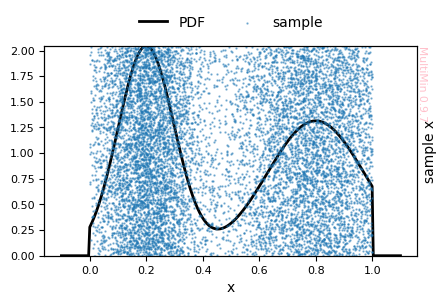

In [7]:
# properties: list (e.g. ["x"]) or dict like MultiPlot (label and optional range per key)
G = MoG_1d.plot_sample(
    properties=["x"],
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3,
)
plt.savefig(f"gallery/{figprefix}_1d_sample.png")

The PDF is zero outside the domain:

In [8]:
print("PDF at 0.5 (inside):", MoG_1d.pdf(np.array([[0.5]])))
print("PDF at -0.1 (outside):", MoG_1d.pdf(np.array([[-0.1]])))

PDF at 0.5 (inside): 0.3160530018742784
PDF at -0.1 (outside): 0.0


## Fitting 1D data on a finite domain

Generate data from the same distribution and fit with **FitMoG(..., domain=[[0, 1]])**. The fitter uses the domain in the likelihood and (by default) bounds the means to the domain.

In [10]:
np.random.seed(42)
data_1d = MoG_1d.rvs(5000)

F_1d = mn.FitMoG(data=data_1d, ngauss=2, domain=[[0, 1]])
F_1d.fit_data(advance=10)

Loading a FitMoG object.
Number of gaussians: 2
Number of variables: 1
Number of dimensions: 2
Number of samples: 5000
Domain: [[0, 1]]
Log-likelihood per point (-log L/N): 0.004026885720446497
Iterations:
Iter 0:
	Vars: [0.71, -0.71, 0.086, 0.92, -4.2, -4.2]
	LogL/N: 0.09798353864465152
Iter 10:
	Vars: [0.039, -0.037, 0.2, 0.78, -4.6, -4.1]
	LogL/N: -0.12867363221859465
Iter 20:
	Vars: [0.041, -0.038, 0.2, 0.79, -4.6, -4.1]
	LogL/N: -0.12932597694140233


In [11]:
F_1d.mog.tabulate(sort_by="weight")

,w,mu_1,sigma_1
component,,,
1,0.509835,0.199924,0.010318
2,0.490165,0.788830,0.028471


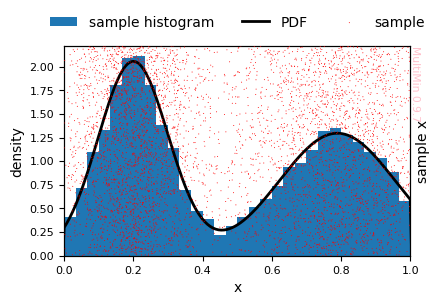

In [12]:
F_1d.plot_fit(
    properties=["x"],
    ranges=[[0, 1]],
    hargs=dict(bins=30, cmap="Spectral_r"),
    sargs=dict(s=0.5, edgecolor="None", color="r"),
    figsize=3,
)
plt.savefig(f"gallery/{figprefix}_1d_fit.png")

In [13]:
print("Fitted parameters:")
F_1d.mog.tabulate(sort_by="weight")

Fitted parameters:


,w,mu_1,sigma_1
component,,,
1,0.509835,0.199924,0.010318
2,0.490165,0.788830,0.028471


And the function:

In [14]:
function, mog = F_1d.mog.get_function()

import numpy as np
from multimin import Util

def mog(X):

    a = 0.0
    b = 1.0

    mu1_1 = 0.199924
    sigma1_1 = 0.010318
    n1 = Util.tnmd(X, mu1_1, sigma1_1, a, b)

    mu2_1 = 0.78883
    sigma2_1 = 0.028471
    n2 = Util.tnmd(X, mu2_1, sigma2_1, a, b)

    w1 = 0.509835
    w2 = 0.490165

    return (
        w1*n1
        + w2*n2
    )


## 3D distribution with one variable on a finite domain

Use **domain=[None, [0, 1], None]**: variables 0 and 2 are unbounded; variable 1 is bounded to $[0, 1]$.

In [15]:
weights = [0.5, 0.5]
mus = [[0.0, 0.3, 0.0], [0.0, 0.7, 0.0]]  # two bumps along the bounded variable (y)
sigmas = [[0.6, 0.15, 0.6], [0.6, 0.15, 0.6]]
Sigmas = [np.diag(s)**2 for s in sigmas]

MoG_3d = mn.MixtureOfGaussians(
    mus=mus,
    weights=weights,
    Sigmas=Sigmas,
    domain=[None, [0, 1], None],  # only variable 1 in [0, 1]
)

Samples: the first and third coordinates are unbounded; the second coordinate lies in $[0, 1]$.

In [16]:
sample_3d = MoG_3d.rvs(3000)
print("Variable 1 (bounded) min/max:", sample_3d[:, 1].min(), sample_3d[:, 1].max())
print("All variable 1 in [0,1]:", np.all((sample_3d[:, 1] >= 0) & (sample_3d[:, 1] <= 1)))

Variable 1 (bounded) min/max: 2.0159534563357617e-06 0.9988410207612409
All variable 1 in [0,1]: True


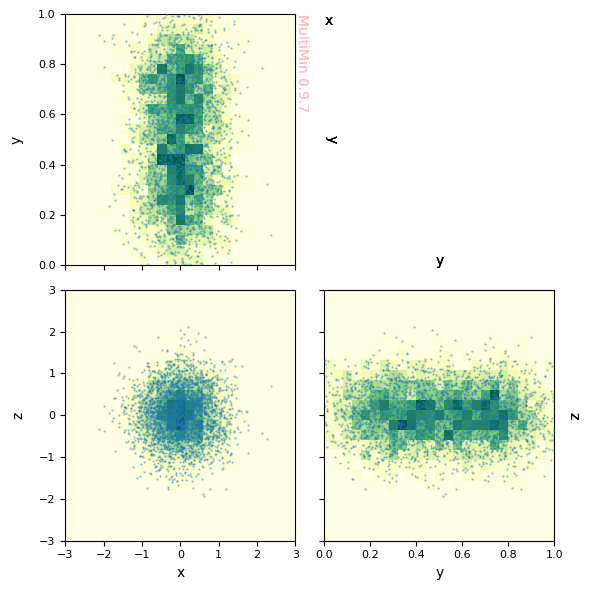

In [17]:
G3 = MoG_3d.plot_sample(
    data=sample_3d,
    properties=["x", "y", "z"],
    ranges=[[-3, 3], [0, 1], [-3, 3]],
    figsize=3,
    hargs=dict(bins=25, cmap="YlGn"),
    sargs=dict(s=0.3, alpha=0.5),
)
plt.tight_layout()
plt.savefig(f"gallery/{figprefix}_3d_sample.png")
plt.show()

## Fitting 3D data with a finite domain on one variable

Fit with `domain=[None, [0, 1], None]` so the likelihood and mean bounds respect the second variable’s domain.

In [20]:
np.random.seed(123)
data_3d = MoG_3d.rvs(5000)

F_3d = mn.FitMoG(data=data_3d, ngauss=2, domain=[None, [0, 1], None])
F_3d.fit_data(advance=30)

Loading a FitMoG object.
Number of gaussians: 2
Number of variables: 3
Number of dimensions: 6
Number of samples: 5000
Domain: [None, [0, 1], None]
Log-likelihood per point (-log L/N): 2.27007315804755
Iterations:
Iter 0:
	Vars: [-0.025, 0.025, 0.05, 0.12, 0.029, 0.64, 0.87, 0.65, -2.2, -4.4, -2.2, -2.2, -4.4, -2.2, 0.65, 1.3, 0.64, 0.9, 1.2, 0.89]
	LogL/N: 3.0902091187997494
Iter 30:
	Vars: [0.08, -0.079, 0.033, 0.3, 0.0027, -0.0039, 0.71, 0.026, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, -0.018, 0.033, -0.018, 0.065, 0.025, -0.0022]
	LogL/N: 1.7362013544790753
Iter 60:
	Vars: [-0.025, 0.032, 0.043, 0.29, -0.0019, -0.0066, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.04, 0.011, -0.022, 0.076, 0.039, -0.021]
	LogL/N: 1.7358856067279056
Iter 75:
	Vars: [-0.039, 0.046, 0.042, 0.29, -0.0027, -0.0056, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.031, 0.012, -0.026, 0.068, 0.038, -0.022]
	LogL/N: 1.7358797044214596


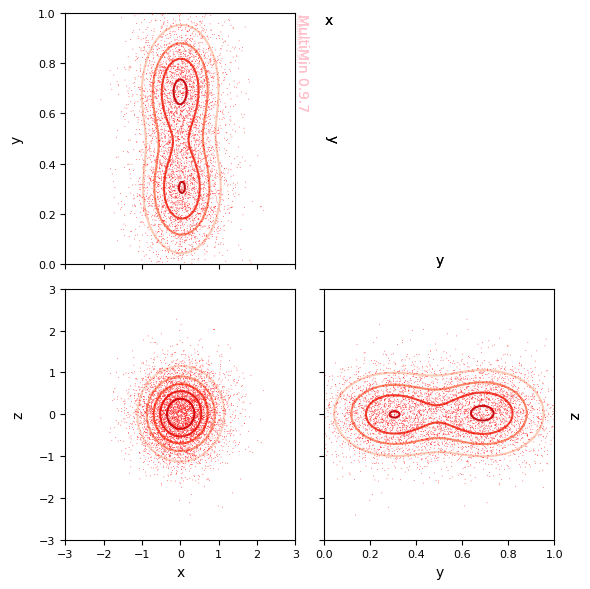

In [46]:
F_3d.plot_fit(
    properties=["x", "y", "z"],
    ranges=[[-3, 3], [0, 1], [-3, 3]],
    pargs=None,
    sargs=dict(s=0.3, edgecolor="None", color="r"),
    cargs=dict(),
    figsize=3,
)
plt.tight_layout()
plt.savefig(f"gallery/{figprefix}_3d_fit.png")
plt.show()

In [47]:
MoG_3d.tabulate(sort_by="distance")

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.5,0.0,0.3,0.0,0.6,0.15,0.6,0.0,0.0,0.0
2,0.5,0.0,0.7,0.0,0.6,0.15,0.6,0.0,0.0,0.0


In [48]:
print("Fitted parameters (note variable 2 = y in [0,1]):")
F_3d.mog.tabulate(sort_by="distance")

Fitted parameters (note variable 2 = y in [0,1]):


,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.489455,0.042126,0.291250,-0.002683,0.605644,0.150459,0.595910,0.015416,0.005950,-0.013201
2,0.510545,-0.005589,0.699513,0.026577,0.591069,0.151054,0.610339,0.033821,0.018985,-0.010914


And the function is:

In [49]:
function, mog = F_3d.mog.get_function()

import numpy as np
from multimin import Util

def mog(X):

    a = [-np.inf, 0.0, -np.inf]
    b = [np.inf, 1.0, np.inf]

    mu1_1 = 0.042126
    mu1_2 = 0.29125
    mu1_3 = -0.002683
    mu1 = [mu1_1, mu1_2, mu1_3]
    Sigma1 = [[0.366805, 0.001405, 0.002147], [0.001405, 0.022638, -0.001184], [0.002147, -0.001184, 0.355108]]
    Z1 = 0.973549
    n1 = Util.tnmd(X, mu1, Sigma1, a, b, Z=Z1)

    mu2_1 = -0.005589
    mu2_2 = 0.699513
    mu2_3 = 0.026577
    mu2 = [mu2_1, mu2_2, mu2_3]
    Sigma2 = [[0.349362, 0.00302, 0.006849], [0.00302, 0.022817, -0.001006], [0.006849, -0.001006, 0.372513]]
    Z2 = 0.976663
    n2 = Util.tnmd(X, mu2, Sigma2, a, b, Z=Z2)

    w1 = 0.489455
    w2 = 0.510545

    return (
        w1*n1
        + w2*n2
    )


In [50]:
X = np.array([[0.0, 0.3, 1.2]])
mog(X), F_3d.mog.pdf(X)

(0.07924013295046034, 0.07924082072895162)

And in LaTeX:

In [51]:
function, _ = F_3d.mog.get_function(type="latex")
display(Markdown(function))

Finite domain. The following variables are truncated (the rest are unbounded):

- Variable $x_{2}$ (index 2): domain $[0.0, 1.0]$.

Truncation region: $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$, with $T$ the set of truncated indices.

$$f(\mathbf{x}) = w_1 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1, \mathbf{a}_T, \mathbf{b}_T) + w_2 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2, \mathbf{a}_T, \mathbf{b}_T)$$

where

Bounds (vectors): $\mathbf{a}_T = (-\infty, 0.0, -\infty)^\top$, $\mathbf{b}_T = (\infty, 1.0, \infty)^\top$.

$$w_1 = 0.489455$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.042126 \\ 0.29125 \\ -0.002683 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 0.366805 & 0.001405 & 0.002147 \\ 0.001405 & 0.022638 & -0.001184 \\ 0.002147 & -0.001184 & 0.355108 \end{array}\right)$$

$$w_2 = 0.510545$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} -0.005589 \\ 0.699513

Finite domain. The following variables are truncated (the rest are unbounded):

- Variable $x_{2}$ (index 2): domain $[0.0, 1.0]$.

Truncation region: $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$, with $T$ the set of truncated indices.

$$f(\mathbf{x}) = w_1 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1, \mathbf{a}_T, \mathbf{b}_T) + w_2 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2, \mathbf{a}_T, \mathbf{b}_T)$$

where

Bounds (vectors): $\mathbf{a}_T = (-\infty, 0.0, -\infty)^\top$, $\mathbf{b}_T = (\infty, 1.0, \infty)^\top$.

$$w_1 = 0.489455$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.042126 \\ 0.29125 \\ -0.002683 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 0.366805 & 0.001405 & 0.002147 \\ 0.001405 & 0.022638 & -0.001184 \\ 0.002147 & -0.001184 & 0.355108 \end{array}\right)$$

$$w_2 = 0.510545$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} -0.005589 \\ 0.699513 \\ 0.026577 \end{array}\right)$$
$$\mathbf{\Sigma}_2 = \left( \begin{array}{ccc} 0.349362 & 0.00302 & 0.006849 \\ 0.00302 & 0.022817 & -0.001006 \\ 0.006849 & -0.001006 & 0.372513 \end{array}\right)$$

Truncated normal. The unbounded normal is

$$\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^{{k}} \det \mathbf{\Sigma}}} \exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \mathbf{\Sigma}^{{-1}} (\mathbf{x}-\boldsymbol{\mu})\right].$$

The truncation region is $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$. The partially truncated normal is

$$\mathcal{TN}_T(\tilde{U}; \tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \frac{\mathcal{N}(\tilde{U}; \tilde{\mu}, \Sigma) \, \mathbf{1}_{A_T}(\tilde{U})}{Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T)},$$

where $\mathbf{1}_{A_T}$ is the indicator of $A_T$ and the normalization constant is

$$Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \int_{A_T} \mathcal{N}(\tilde{T}; \tilde{\mu}, \Sigma) \, d\tilde{T} = \mathbb{P}_{\tilde{T} \sim \mathcal{N}(\tilde{\mu},\Sigma)}(\tilde{T} \in A_T).$$

Finite domain. The following variables are truncated (the rest are unbounded):

- Variable $x_2$ (index 2): domain $[0.0, 1.0]$.

Truncation region: $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$, with $T$ the set of truncated indices.

$$f(\mathbf{x}) = w_1 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1, \mathbf{a}_T, \mathbf{b}_T) + w_2 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2, \mathbf{a}_T, \mathbf{b}_T)$$

where

Bounds (vectors): $\mathbf{a}_T = (-\infty, 0.0, -\infty)^\top$, $\mathbf{b}_T = (\infty, 1.0, \infty)^\top$.

$$w_1 = 0.489088$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.042197 \\ 0.291123 \\ -0.00285 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 0.366817 & 0.001419 & 0.00217 \\ 0.001419 & 0.022609 & -0.00123 \\ 0.00217 & -0.00123 & 0.355096 \end{array}\right)$$

$$w_2 = 0.510912$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} -0.005599 \\ 0.699398 \\ 0.026692 \end{array}\right)$$
$$\mathbf{\Sigma}_2 = \left( \begin{array}{ccc} 0.349353 & 0.003032 & 0.006884 \\ 0.003032 & 0.022845 & -0.001046 \\ 0.006884 & -0.001046 & 0.37253 \end{array}\right)$$

Truncated normal. The unbounded normal is

$$\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^{{k}} \det \mathbf{\Sigma}}} \exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \mathbf{\Sigma}^{{-1}} (\mathbf{x}-\boldsymbol{\mu})\right].$$

The truncation region is $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$. The partially truncated normal is

$$\mathcal{TN}_T(\tilde{U}; \tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \frac{\mathcal{N}(\tilde{U}; \tilde{\mu}, \Sigma) \, \mathbf{1}_{A_T}(\tilde{U})}{Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T)},$$

where $\mathbf{1}_{A_T}$ is the indicator of $A_T$ and the normalization constant is

$$Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \int_{A_T} \mathcal{N}(\tilde{T}; \tilde{\mu}, \Sigma) \, d\tilde{T} = \mathbb{P}_{\tilde{T} \sim \mathcal{N}(\tilde{\mu},\Sigma)}(\tilde{T} \in A_T).$$

---
**MultiMin** – Multivariate Gaussian fitting with finite domains  
© 2026 Jorge I. Zuluaga